# Online State Estimation with the Kalman Filter

This example shows how class `KalmanFilter` can be used to estimate hidden
states in an online setting.

While the Kalman Smoother is able to estimate the hidden state of a target at
any time step using **all** measurements, the Kalman Filter only uses
measurements up to and including the current time step.  This is done using a
set of recursive formulae that only require the mean and covariance matrix
output by the Kalman Filter at the previous time step, meaning that we may
apply the Kalman Filter in an online manner.

The drawn figure shows two sets of lines; the first represents the true, hidden
state of the target, while the second represents the estimates output by the
Kalman Filter.

In [5]:
import numpy as np
import pylab as pl

from pykalman.datasets import load_robot
from pykalman import KalmanFilter

First, we will initialize the Kalman Filter.

In [6]:
data = load_robot()
kf = KalmanFilter(
    data.transition_matrix,
    data.observation_matrix,
    data.initial_transition_covariance,
    data.initial_observation_covariance,
    data.transition_offsets,
    data.observation_offset,
    data.initial_state_mean,
    data.initial_state_covariance,
    random_state=0,
)

Estimate the mean and covariance of the hidden state distribution iteratively. This is equivalent to:

`>>> (filter_state_means, filtered_state_covariance) = kf.filter(data)`

In [7]:
n_timesteps = data.observations.shape[0]
n_dim_state = data.transition_matrix.shape[0]
filtered_state_means = np.zeros((n_timesteps, n_dim_state))
filtered_state_covariances = np.zeros((n_timesteps, n_dim_state, n_dim_state))
for t in range(n_timesteps - 1):
    if t == 0:
        filtered_state_means[t] = data.initial_state_mean
        filtered_state_covariances[t] = data.initial_state_covariance
    filtered_state_means[t + 1], filtered_state_covariances[t + 1] = kf.filter_update(
        filtered_state_means[t],
        filtered_state_covariances[t],
        data.observations[t + 1],
        transition_offset=data.transition_offsets[t],
    )

Finally, plot the estimates.

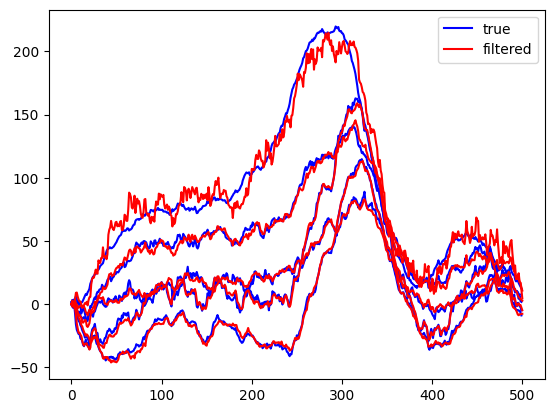

In [8]:
pl.figure()
lines_true = pl.plot(data.states, color="b")
lines_filt = pl.plot(filtered_state_means, color="r")
pl.legend((lines_true[0], lines_filt[0]), ("true", "filtered"))
pl.show()